# Simple Linear Regression

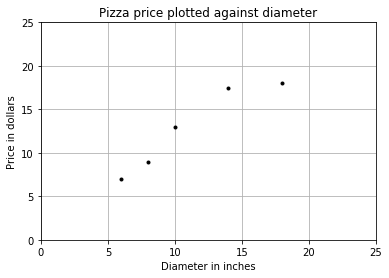

In [2]:
'''
Let's model the relationship between the size of a pizza and its price. First,
we will write a program with scikit-learn that can predict the price of a pizza given
its size. Then, we will discuss how simple linear regression works and how it can
be generalized to work with other types of problems. Let's assume that you have
recorded the diameters and prices of pizzas that you have previously eaten in your
pizza journal. These observations comprise our training data:
Training instance Diameter (in inches) Price (in dollars)
1 6 7
2 8 9
3 10 13
4 14 17.5
5 18 18
We can visualize our training data by plotting it on a graph using matplotlib:
'''
import matplotlib.pyplot as plt
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]

plt.figure()
     
plt.title('Pizza price plotted against diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.plot(X, y, 'k.')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.show()

We can see from the graph of the training data that there is a positive relationship
between the diameter of a pizza and its price, which should be corroborated by our
own pizza-eating experience. As the diameter of a pizza increases, its price generally
increases too.

The following pizza-price predictor program models this relationship
using linear regression. Let's review the following program and discuss how linear
regression works:

In [4]:
from sklearn.linear_model import LinearRegression
# Training Data
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
# Create and fit the model
model = LinearRegression()
model.fit(X, y)
print 'A 12" pizza should cost: $%.2f' % model.predict([12])[0]


A 12" pizza should cost: $13.68


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


Simple linear regression assumes that a linear relationship exists between the
response variable and explanatory variable; it models this relationship with a linear
surface called a hyperplane. A hyperplane is a subspace that has one dimension
less than the ambient space that contains it. In simple linear regression, there is one
dimension for the response variable and another dimension for the explanatory
variable, making a total of two dimensions. The regression hyperplane therefore,
has one dimension; a hyperplane with one dimension is a line.

# Evaluating the fitness of a model with a cost function

A cost function, also called a loss function, is used to define and measure the
error of a model. The differences between the prices predicted by the model and
the observed prices of the pizzas in the training set are called residuals or training
errors. Later, we will evaluate a model on a separate set of test data; the differences
between the predicted and observed values in the test data are called prediction
errors or test errors.

#### Compute the residual sum of squares for our model by adding the following two lines to the previous script:

In [5]:
import numpy as np
print 'Residual sum of squares: %.2f' % np.mean((model.predict(X)-y)**2)

Residual sum of squares: 1.75


Now that we have a cost function, we can find the values of our model's parameters that minimize it.

# Solving ordinary least squares for simple linear regression

Our goal is to solve the values of alpha and beta that minimize the cost
function. We will solve beta first. To do so, we will calculate the variance of x and
covariance of x and y.

In [9]:
from __future__ import division
xbar = (6 + 8 + 10 + 14 + 18) / 5
variance = ((6 - xbar)**2 + (8 - xbar)**2 + (10 - xbar)**2 + (14 -xbar)**2 + (18 - xbar)**2) / 4
print variance

# Alternate Code using Numpy. ddof=1 means Bessel's correction to calculate variance
print np.var([6, 8, 10, 14, 18], ddof=1)

23.2
23.2


Covariance is a measure of how much two variables change together. If the value of
the variables increase together, their covariance is positive. If one variable tends to
increase while the other decreases, their covariance is negative. If there is no linear
relationship between the two variables, their covariance will be equal to zero; the
variables are linearly uncorrelated but not necessarily independent.

In [11]:
# Covariance
print np.cov([6, 8, 10, 14, 18], [7, 9, 13, 17.5, 18])[0][1]

22.65


Now that we have calculated the variance of our explanatory variable and the
covariance of the response and explanatory variables, we can solve  using the
following formula:

    beta = cov(x,y)/var(x)
    = 22.65/23.2
    = 0.976

Having solved beta , we can solve alpha using the following formula:
alpha = y -beta*x

In the preceding formula, y is the mean of y and x is the mean of x. (x, y ) are the
coordinates of the centroid, a point that the model must pass through. We can use
the centroid and the value of beta to solve for alpha as follows:

    alpha = 12.9 − 0.9762931034482758×11.2 
          =1.9655172413793114
Now that we have solved the values of the model's parameters that minimize the
cost function, we can plug in the diameters of the pizzas and predict their prices. For
instance, an 11-inch pizza is expected to cost around $12.70, and an 18-inch pizza is
expected to cost around $19.54.

Congratulations! You used simple linear regression
to predict the price of a pizza.

# Evaluating the Model

In [12]:
from sklearn.linear_model import LinearRegression
X = [[6], [8], [10], [14], [18]]
y = [[7], [9], [13], [17.5], [18]]
X_test = [[8], [9], [11], [16], [12]]
y_test = [[11], [8.5], [15], [18], [11]]

model = LinearRegression()
model.fit(X, y)
print 'R-squared: %.4f' % model.score(X_test, y_test)

R-squared: 0.6620


# Multiple Linear Regression

How can we improve the model?
Let's add the number of toppings to our
training data as a second explanatory variable. We cannot proceed with simple linear
regression, but we can use a generalization of simple linear regression that can use
multiple explanatory variables called multiple linear regression.

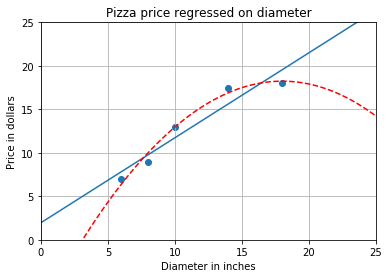

[[6], [8], [10], [14], [18]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
[[6], [8], [11], [16]]
[[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]
Simple linear regression r-squared 0.809726797708
Quadratic regression r-squared 0.867544365635


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6], [8], [11], [16]]
y_test = [[8], [12], [15], [18]]

regressor = LinearRegression()
regressor.fit(X_train, y_train)
xx = np.linspace(0, 26, 100)
yy = regressor.predict(xx.reshape(xx.shape[0], 1))
plt.plot(xx, yy)

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, y_train)
xx_quadratic = quadratic_featurizer.transform(xx.reshape(xx.
shape[0], 1))
plt.plot(xx, regressor_quadratic.predict(xx_quadratic), c='r',
linestyle='--')

plt.title('Pizza price regressed on diameter')
plt.xlabel('Diameter in inches')
plt.ylabel('Price in dollars')
plt.axis([0, 25, 0, 25])
plt.grid(True)
plt.scatter(X_train, y_train)
plt.show()
print X_train
print X_train_quadratic
print X_test
print X_test_quadratic
print 'Simple linear regression r-squared', regressor.score(X_test, y_test)
print 'Quadratic regression r-squared', regressor_quadratic.score(X_test_quadratic, y_test)

The simple linear regression model is plotted with the solid line in the following
figure. Plotted with a dashed line, the quadratic regression model visibly fits the
training data better.

# Regularization

Regularization is a collection of techniques that can be used to prevent over-fitting.
Regularization adds information to a problem, often in the form of a penalty against
complexity, to a problem. Occam's razor states that a hypothesis with the fewest
assumptions is the best. Accordingly, regularization attempts to find the simplest
model that explains the data.



# Applying Linear Regression - New Data Set

Now we'll use a real
data set and apply linear regression to an important task. Assume that you are at
a party, and that you wish to drink the best wine that is available. You could ask
your friends for recommendations, but you suspect that they will drink any wine,
regardless of its provenance. Fortunately, you have brought pH test strips and
other tools to measure various physicochemical properties of wine—it is, after all,
a party. We will use machine learning to predict the quality of the wine based on
its physicochemical attributes.
The UCI Machine Learning Repository's Wine data set measures eleven
physicochemical attributes, including the pH and alcohol content, of 1,599 different
red wines. Each wine's quality has been scored by human judges. The scores range
from zero to ten; zero is the worst quality and ten is the best quality. The data set can
be downloaded from https://archive.ics.uci.edu/ml/datasets/Wine. We will
approach this problem as a regression task and regress the wine's quality onto one
or more physicochemical attributes. The response variable in this problem takes only
integer values between 0 and 10; we could view these as discrete values and approach
the problem as a multiclass classification task. In this chapter, however, we will view
the response variable as a continuous value.

In [27]:
# import pandas 
# load file
import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=';')
# df.keys()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


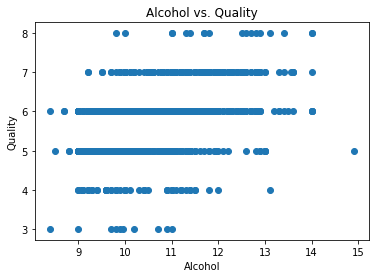

In [21]:
# lets create a some scatter plots 
import matplotlib.pylab as plt
plt.scatter(df['alcohol'], df['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Alcohol vs. Quality')
plt.show()

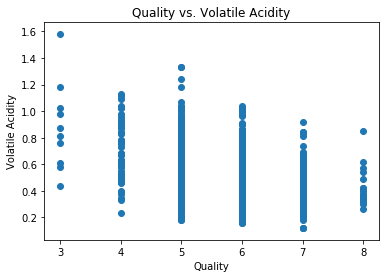

In [26]:
plt.scatter(df['quality'], df['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.title('Quality vs. Volatile Acidity')
plt.show()

These plots suggest that the response variable depends on multiple explanatory
variables; let's model the relationship with multiple linear regression. How can we
decide which explanatory variables to include in the model? Dataframe.corr()
calculates a pairwise correlation matrix. The correlation matrix confirms that the
strongest positive correlation is between the alcohol and quality, and that quality
is negatively correlated with volatile acidity, an attribute that can cause wine to
taste like vinegar. To summarize, we have hypothesized that good wines have high
alcohol content and do not taste like vinegar. This hypothesis seems sensible, though
it suggests that wine aficionados may have less sophisticated palates than they claim.

In [28]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Fitting and Evaluating the Model

Now we will split the data into training and testing sets, train the regressor, and evaluate its 
predictions.

In [34]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

df = pd.read_csv('winequality-red.csv', sep=';')

# Separate response variable from the explanatory variable
X = df[list(df.columns)[:-1]]
y = df['quality']

# Randomly partition the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predictions = regressor.predict(X_test)
print 'R-squared:', regressor.score(X_test, y_test)

R-squared: 0.295327992839


R-squared score indicated that 29.5% of the variance in the test set is explained by the model.

We can use cross-validation to produce a better estimate of the estimators performance.

Each cross-validation round trains and test different partitions of the data to reduce variability.

In [37]:
import pandas as pd
from sklearn. cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
df = pd.read_csv('winequality-red.csv', sep=';')
X = df[list(df.columns)[:-1]]
y = df['quality']
regressor = LinearRegression()
scores = cross_val_score(regressor, X, y, cv=5)
print scores.mean(), scores

0.290041628842 [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


We specified a five-fold cross validation
using the cv keyword argument, that is, each instance will be randomly assigned
to one of the five partitions.

Each partition will be used to train and test the model.
cross_val_score returns the value of the estimator's score method for each
round. The r-squared scores range from 0.13 to 0.36! The mean of the scores, 0.29, is a
better estimate of the estimator's predictive power than the r-squared score produced
from a single train / test split.

# Fitting models with gradient descent

In this example, we will predict the prices of houses in the Boston Housing data set from 13 
explanatory variables

In [42]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

# Scale the features using StandardScaler
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

# train the estimator using StandardScaler
regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print 'Cross validation r-squared scores:', scores
print 'Average cross validation r-squared score:', np.mean(scores)
regressor.fit_transform(X_train, y_train)
print 'Test set r-squared score', regressor.score(X_test, y_test)

Cross validation r-squared scores: [ 0.67793775  0.72030293  0.66258138  0.65898153  0.67223326]
Average cross validation r-squared score: 0.678407368779
Test set r-squared score 0.760525746736


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single fea